<a href="https://colab.research.google.com/github/Yavar-Azar/ML_Course/blob/master/Introduction/session1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Introduction

We are going to introduce basic libraries in the python
including  numpy, matplotlib, scikit-learn  and  tensorflow



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

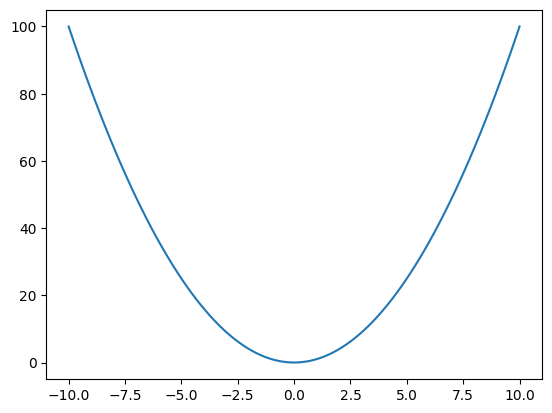

In [ ]:
x = np.linspace(-10,10,100)
y = x**2

plt.plot(x,y)

In [ ]:
x_new = np.reshape(x,(100,1))

In [ ]:
 # how to check the shape of x_new
 # np.shape(x_new)


mult = x_new*x_new

In [ ]:
np.shape(mult)

(100, 1)

In [ ]:
inner = np.dot(x_new.T, x_new)

In [ ]:
np.shape(inner)

(1, 1)

In [ ]:
rand =np.random.rand(4,6)

In [ ]:
rand[:,1]

array([0.07117324, 0.70848461, 0.32932133, 0.01627818])

In [ ]:
eye = np.eye(6,6)

In [ ]:
eye

array([[1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.]])

In [ ]:
a =5/3

In [ ]:
type(a)
print(a)

1.6666666666666667


In [ ]:
print(f'this is my value {a:8.4f}  and {a:12.8f}')

this is my value   1.6667  and   1.66666667


(<matplotlib.image.AxesImage at 0x7b79a3fb5420>,
 <matplotlib.colorbar.Colorbar at 0x7b79a3f9e320>)

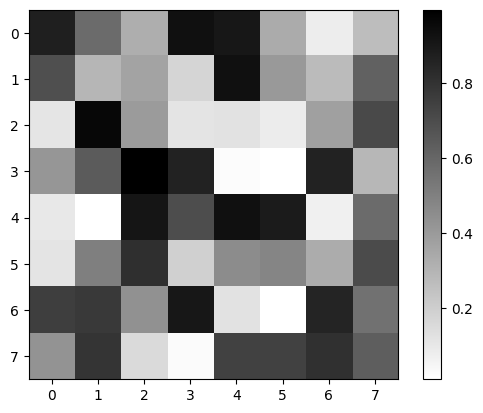

In [ ]:
two_d = np.random.rand(8,8)

plt.imshow(two_d, cmap='binary'), plt.colorbar()

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
data = pd.read_csv(url)

# Check the first few rows
print(data)

       Month  Passengers
0    1949-01         112
1    1949-02         118
2    1949-03         132
3    1949-04         129
4    1949-05         121
..       ...         ...
139  1960-08         606
140  1960-09         508
141  1960-10         461
142  1960-11         390
143  1960-12         432

[144 rows x 2 columns]


<Axes: >

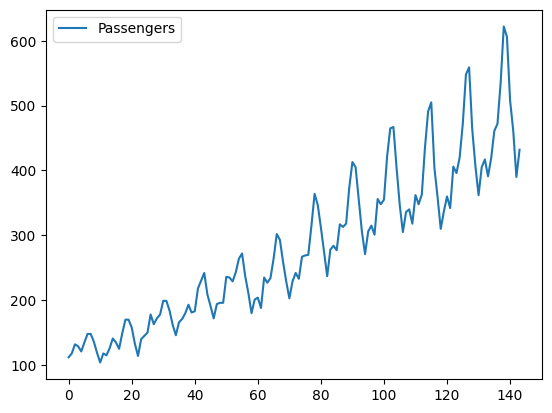

In [61]:
data.plot()

## 2. Preprocessing the Data
We need to preprocess the data by normalizing it and converting it into a suitable format for the LSTM model. LSTMs require data in the shape [samples, time steps, features].

In [62]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Extract the passengers column as the feature we want to predict
dataset = data['Passengers'].values


In [63]:
dataset

array([112, 118, 132, 129, 121, 135, 148, 148, 136, 119, 104, 118, 115,
       126, 141, 135, 125, 149, 170, 170, 158, 133, 114, 140, 145, 150,
       178, 163, 172, 178, 199, 199, 184, 162, 146, 166, 171, 180, 193,
       181, 183, 218, 230, 242, 209, 191, 172, 194, 196, 196, 236, 235,
       229, 243, 264, 272, 237, 211, 180, 201, 204, 188, 235, 227, 234,
       264, 302, 293, 259, 229, 203, 229, 242, 233, 267, 269, 270, 315,
       364, 347, 312, 274, 237, 278, 284, 277, 317, 313, 318, 374, 413,
       405, 355, 306, 271, 306, 315, 301, 356, 348, 355, 422, 465, 467,
       404, 347, 305, 336, 340, 318, 362, 348, 363, 435, 491, 505, 404,
       359, 310, 337, 360, 342, 406, 396, 420, 472, 548, 559, 463, 407,
       362, 405, 417, 391, 419, 461, 472, 535, 622, 606, 508, 461, 390,
       432])

In [15]:
dataset = dataset.astype('float64')

In [16]:
dataset

array([112., 118., 132., 129., 121., 135., 148., 148., 136., 119., 104.,
       118., 115., 126., 141., 135., 125., 149., 170., 170., 158., 133.,
       114., 140., 145., 150., 178., 163., 172., 178., 199., 199., 184.,
       162., 146., 166., 171., 180., 193., 181., 183., 218., 230., 242.,
       209., 191., 172., 194., 196., 196., 236., 235., 229., 243., 264.,
       272., 237., 211., 180., 201., 204., 188., 235., 227., 234., 264.,
       302., 293., 259., 229., 203., 229., 242., 233., 267., 269., 270.,
       315., 364., 347., 312., 274., 237., 278., 284., 277., 317., 313.,
       318., 374., 413., 405., 355., 306., 271., 306., 315., 301., 356.,
       348., 355., 422., 465., 467., 404., 347., 305., 336., 340., 318.,
       362., 348., 363., 435., 491., 505., 404., 359., 310., 337., 360.,
       342., 406., 396., 420., 472., 548., 559., 463., 407., 362., 405.,
       417., 391., 419., 461., 472., 535., 622., 606., 508., 461., 390.,
       432.])

In [70]:
scaler = MinMaxScaler(feature_range=(0, 1))

dataset = scaler.fit_transform(dataset.reshape(-1, 1))

In [65]:
dataset[0]

array([0.01544402])

In [66]:
dataset[1:4,0]

array([0.02702703, 0.05405405, 0.04826255])

In [71]:
def create_dataset(data, look_back=1):
    X, Y = [], []
    for i in range(len(data) - look_back - 1):
        X.append(data[i:(i + look_back), 0])
        Y.append(data[i + look_back, 0])
    return np.array(X), np.array(Y)


# Create a dataset with a look-back of 1 (using the previous month to predict the next)
look_back = 1
X, Y = create_dataset(dataset, look_back)


In [72]:
# Reshape input to be [samples, time steps, features]
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

In [73]:
X.shape

(142, 1, 1)

In [74]:

# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=False)

3. Building the LSTM Model
Now, let’s create an LSTM model using TensorFlow’s Keras API. We’ll create a simple model with a single LSTM layer followed by a Dense layer.



In [75]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input


import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

# Build the LSTM model
model = Sequential()

# Add Input layer
model.add(Input(shape=(look_back, 1)))

# Add LSTM layer
model.add(LSTM(50, return_sequences=False))  # LSTM layer with 50 units

# Add Dense output layer
model.add(Dense(1))  # Output layer

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Summary of the model
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 50)                  │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

4. Training the Model
We will now train the model using the training dataset.

Epoch 1/100
113/113 - 2s - 14ms/step - loss: 0.0398
Epoch 2/100
113/113 - 0s - 3ms/step - loss: 0.0166
Epoch 3/100
113/113 - 0s - 3ms/step - loss: 0.0124
Epoch 4/100
113/113 - 0s - 2ms/step - loss: 0.0086
Epoch 5/100
113/113 - 0s - 3ms/step - loss: 0.0058
Epoch 6/100
113/113 - 0s - 3ms/step - loss: 0.0041
Epoch 7/100
113/113 - 0s - 2ms/step - loss: 0.0033
Epoch 8/100
113/113 - 0s - 3ms/step - loss: 0.0029
Epoch 9/100
113/113 - 0s - 2ms/step - loss: 0.0029
Epoch 10/100
113/113 - 0s - 3ms/step - loss: 0.0032
Epoch 11/100
113/113 - 0s - 2ms/step - loss: 0.0028
Epoch 12/100
113/113 - 0s - 2ms/step - loss: 0.0030
Epoch 13/100
113/113 - 0s - 2ms/step - loss: 0.0030
Epoch 14/100
113/113 - 0s - 3ms/step - loss: 0.0028
Epoch 15/100
113/113 - 0s - 3ms/step - loss: 0.0029
Epoch 16/100
113/113 - 0s - 3ms/step - loss: 0.0029
Epoch 17/100
113/113 - 0s - 3ms/step - loss: 0.0029
Epoch 18/100
113/113 - 0s - 2ms/step - loss: 0.0029
Epoch 19/100
113/113 - 0s - 3ms/step - loss: 0.0030
Epoch 20/100
113/113

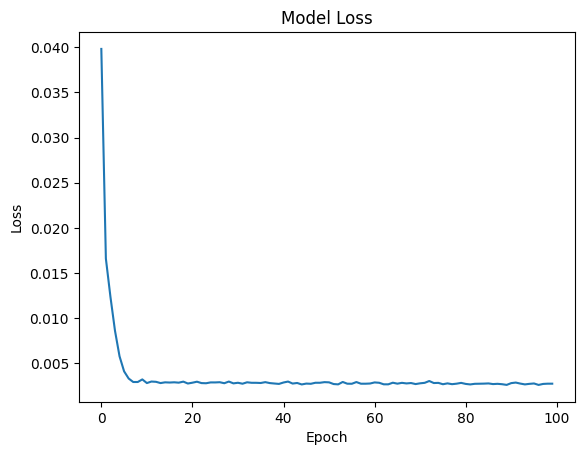

In [76]:
# Train the model
history = model.fit(X_train, Y_train, epochs=100, batch_size=1, verbose=2)

# Plot training loss
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

In [77]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 50)                  │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,355 (122.48 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 20,904 (81.66 KB)

5. Evaluating the Model

After training, we evaluate the model on the test data to see how well it generalizes.



In [78]:
# Make predictions
trainPredict = model.predict(X_train)
testPredict = model.predict(X_test)

# Inverse the predictions to get the original scale
trainPredict = scaler.inverse_transform(trainPredict)
testPredict = scaler.inverse_transform(testPredict)

# Inverse the true values to get the original scale
Y_train_original = scaler.inverse_transform([Y_train])
Y_test_original = scaler.inverse_transform([Y_test])

# Calculate the RMSE (Root Mean Squared Error)
trainScore = np.sqrt(np.mean((trainPredict[:,0] - Y_train_original[0])**2))
testScore = np.sqrt(np.mean((testPredict[:,0] - Y_test_original[0])**2))

print(f'Train Score: {trainScore:.2f} RMSE')
print(f'Test Score: {testScore:.2f} RMSE')


1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Train Score: 0.05 RMSE
Test Score: 0.10 RMSE


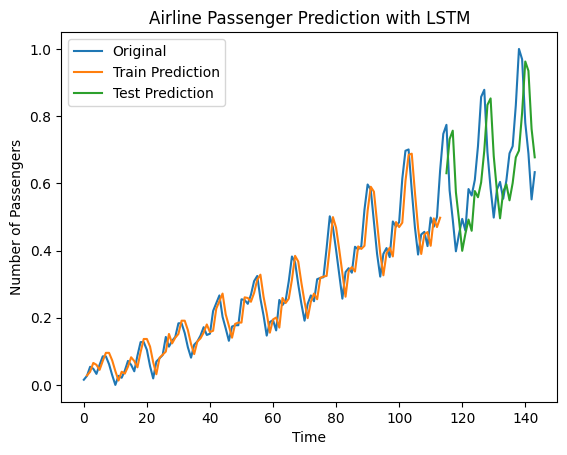

In [79]:
# Shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict) + look_back, :] = trainPredict

# Shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan

# Correct the index calculation for test predictions
test_start_idx = len(trainPredict) + (look_back * 2)
testPredictPlot[test_start_idx:test_start_idx + len(testPredict), :] = testPredict

# Plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.title('Airline Passenger Prediction with LSTM')
plt.xlabel('Time')
plt.ylabel('Number of Passengers')
plt.legend(['Original', 'Train Prediction', 'Test Prediction'])
plt.show()